In [1]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.abspath('../..'))
from project_paths import PROJECT_ROOT
from Paper.figure_scripts import common

In [2]:
file = f'{PROJECT_ROOT}Data/GPU_test/matmul.csv'

df = pd.read_csv(file)
df = df[df["dtype"] != "f64"]
df = df.sort_values(["dtype", "batch"])

df

,n,batch,dtype,time_s,speedup,mem_used_GB
3,1000,1,bf16,0.000049,2.832143,77.578437
7,2000,1,bf16,0.000094,5.183029,77.578437
11,4000,1,bf16,0.000316,12.272646,77.580534
15,8000,1,bf16,0.002278,12.946813,77.580534
19,16000,1,bf16,0.018888,12.972752,77.580534
2,1000,1,f16,0.000051,2.701774,77.578437
6,2000,1,f16,0.000099,4.945763,77.578437
10,4000,1,f16,0.000357,10.861843,77.580534
14,8000,1,f16,0.002484,11.870931,77.580534
18,16000,1,f16,0.021033,11.650041,77.580534


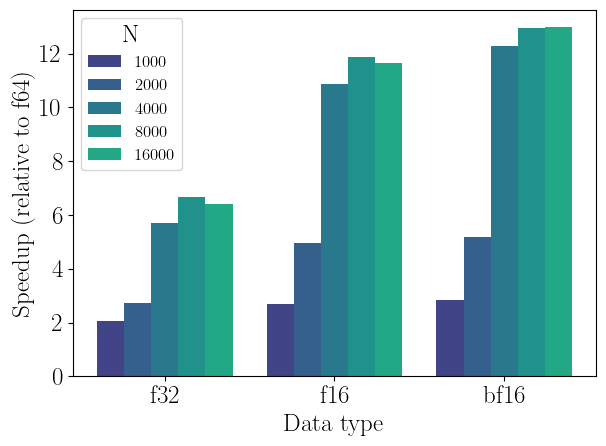

In [3]:
dtypes = df["dtype"].unique()
ns = sorted(df["n"].unique())
colors = plt.cm.viridis(np.linspace(0.2, 0.6, len(ns)))
dtypes = ["f32", "f16", "bf16"]

x = np.arange(len(dtypes))
width = 0.8 / len(ns)

for i, n in enumerate(ns):
    subset = (
        df[df["n"] == n]
        .set_index("dtype")
        .loc[dtypes]
        .reset_index()
    )

    plt.bar(
        x + i * width,
        subset["speedup"],
        width=width,
        label=f"{n}",
        color=colors[i]
    )

plt.xticks(x + width * (len(ns) - 1) / 2, dtypes)
plt.xlabel("Data type")
plt.ylabel("Speedup (relative to f64)")
plt.legend(title="N")
plt.tight_layout()
plt.savefig('figures/matmul.pdf', bbox_inches="tight")
plt.show()